### Лабораторная Работа №3. Car price prediction
**Темнова Дарина гр.3530903/70302** <br>
**Остренко Таисия гр.3530903/70302** <br>
**Федоров Андрей гр.3530903/70302** <br>

### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    **3530903_70302: Mercedes**<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


#### 1. Выбрать набор данных для своей группы:
> **3530903_70302: Mercedes**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

In [3]:
auto_data = pd.read_csv("data/merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


> **mileage** - пробег <br>
**tax** - налог на авто <br>
**mpg** - расход топлива (миль/галлон) ##чем больше, тем лучше

In [4]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000,13119.000,13119.000,13119.000,13119.000,13119.000
mean,2017.296,24698.597,21949.559,129.972,55.156,2.072
std,2.225,11842.676,21176.512,65.260,15.220,0.572
min,1970.000,650.000,1.000,0.000,1.100,0.000
25%,2016.000,17450.000,6097.500,125.000,45.600,1.800
50%,2018.000,22480.000,15189.000,145.000,56.500,2.000
75%,2019.000,28980.000,31779.500,145.000,64.200,2.100
max,2020.000,159999.000,259000.000,580.000,217.300,6.200


> **Посмотрим, сколько автомобилей разных моделей**

<AxesSubplot:xlabel='model', ylabel='count'>

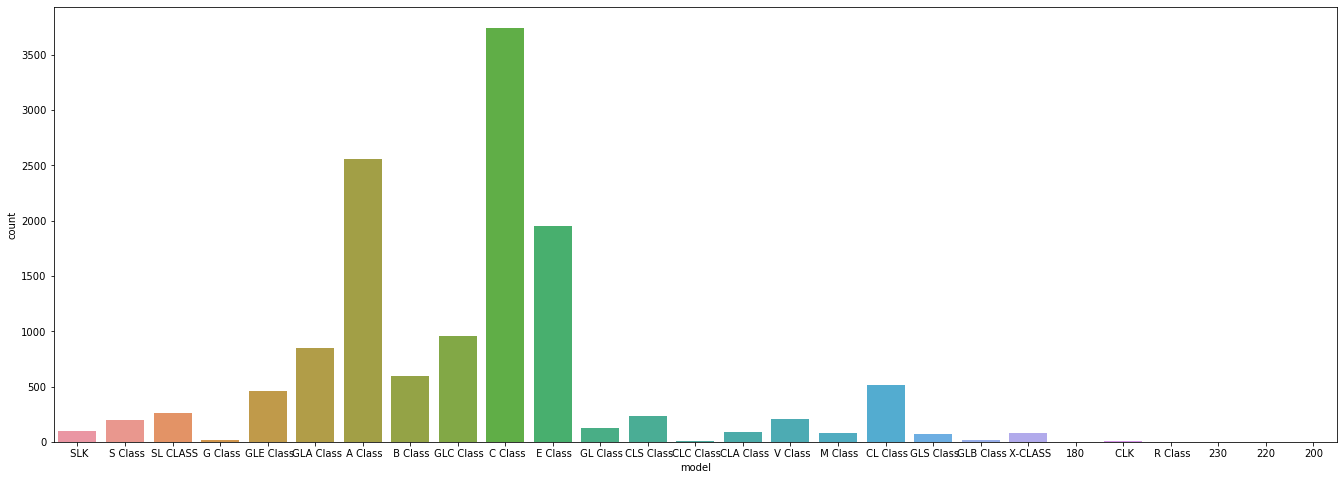

In [5]:
fig, ax = plt.subplots(figsize=(23, 8))
sns.countplot(x='model', ax=ax, data=auto_data)

> **Посмотрим среднюю цену автомобилей каждого класса одного года**


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
model_year_data = auto_data.groupby(['year', 'model']).mean()
model_year_data.head(219)

price     mileage      tax     mpg  engineSize
year model                                                          
1970  M Class     24999.000   14000.000  305.000  39.200       0.000
1997  SL CLASS     9995.000   76000.000  255.000  28.200       3.200
1998  S Class     19990.000   43534.000  265.000  23.300       6.000
      SL CLASS    10450.000   49000.000  255.000  28.200       3.200
      SLK          1990.000  106428.500  265.000  32.100       2.300
1999  S Class      5995.000   34000.000  145.000  24.600       3.200
2000  SL CLASS    11750.000   68709.000  270.000  24.600       3.200
      SLK          2740.000  100118.500  267.500  27.200       3.200
2001  E Class      3990.000   60997.000  325.000  29.400       2.000
      S Class      3095.000   87400.000  447.500  28.150       3.200
      SL CLASS    12999.000  122000.000  305.000  22.300       5.000
      SLK          4400.000   61959.000  325.000  28.900       2.550
2002  C Class      1817.500   33250.000  315.000  35.600       2.350
      CL Class     8995.000   77000.000  325.000  21.100       5.400
      CLK          3790.000   98000.000  325.000  24.600       5.000
      S Class      6995.000   24000.000  570.000  21.100       5.000
      SL CLASS    16999.000   34000.000  325.000  22.200       5.000
      SLK          3990.000   72340.000  326.667  30.233       2.200
2003  A Class       650.000  109090.000  235.000  40.000       1.400
      CLK          3435.500  145000.000  280.000  28.500       3.500
      SL CLASS    12995.000   47450.000  325.000  22.200       5.000
      SLK          4543.333   58301.333  326.667  29.067       2.600
2004  C Class      1637.500  118500.000  282.500  38.000       2.000
      CLK          2963.000   91666.667  295.000  36.700       2.400
      M Class     10972.500  143000.000  327.500  24.850       3.200
      SLK          4558.333   71454.167  325.833  29.683       2.550
2005  B Class      2490.000  101980.000  200.000  47.900       2.000
      C Class      2690.000  109000.000  325.000  32.100       1.800
      CLK          1995.000  105000.000  260.000  43.500       2.100
      E Class      3740.000   76095.500  325.000  32.500       1.800
      S Class      6492.500   57074.000  322.500  36.700       3.200
      SL CLASS     6995.000   80543.000  325.000  24.100       3.700
      SLK          5200.000   63000.000  325.000  32.100       1.800
2006  A Class      2880.000   66000.000  160.000  52.300       2.000
      C Class      2861.667  113333.333  376.667  34.433       2.500
      E Class      2995.000  137827.000  325.000  34.900       3.000
      SLK          5945.000   70317.333  561.667  28.167       3.333
2007  A Class      2517.000   76121.250  168.750  48.900       1.750
      B Class      3990.000   74822.500  202.500  47.500       2.000
      C Class      4476.667   96278.000  338.333  35.133       2.033
      CLS Class    4395.000   90000.000  300.000  27.700       3.000
      E Class      4880.000   58000.000  315.000  37.200       3.000
      GL Class     7915.000   89000.000  570.000  28.800       3.000
      M Class      6750.000   67000.000  555.000  28.800       3.000
      R Class      6950.000   60000.000  565.000  30.400       3.000
      SL CLASS    12995.000   45000.000  570.000  23.300       5.000
      SLK          5892.500   71500.000  325.000  32.100       1.800
     230           4500.000   94000.000  520.000  29.400       0.000
2008  B Class      3990.000   52691.000  235.000  39.800       1.700
      C Class      4990.571   94062.000  255.714  40.057       2.014
      CL Class    18975.000   69000.000  570.000  19.000       6.200
      E Class     14995.000   55000.000  570.000  19.800       6.200
      M Class      6242.500  103000.000  560.000  28.800       3.000
      SLK          6525.000   65488.500  300.000  33.225       2.100
2009  B Class      4344.500   64000.000  192.500  46.600       1.750
      C Class      5686.143   87714.286  242.857  41.343       2.086
      E Class      5

In [10]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 10)

> **Посмотрим, что там с коробкой передач**

In [11]:
model_year_data = auto_data.groupby(['transmission']).mean()
model_year_data.head()

,year,price,mileage,tax,mpg,engineSize
transmission,,,,,,
Automatic,2016.813,24406.960,25939.244,137.374,54.727,2.162
Manual,2016.439,15442.435,32311.330,90.734,59.590,1.721
Other,2015.500,15847.500,34947.500,137.500,56.500,1.050
Semi-Auto,2017.818,26858.461,16949.760,133.029,54.523,2.082


In [12]:
#auto_data = pd.read_csv("data/merc.csv")
#auto_data['transmission'] = auto_data['transmission'].apply(lambda x: 4 if x=='Automatic' else 3 if x=='Semi-Auto' else 2 if x=='Other' else 1)
#auto_data

> **Посмотрим, что с топливом**

In [13]:
model_year_data = auto_data.groupby(['fuelType']).mean()
model_year_data.head()

,year,price,mileage,tax,mpg,engineSize
fuelType,,,,,,
Diesel,2017.112,23275.123,24690.362,119.988,59.020,2.089
Hybrid,2016.659,23091.572,37701.116,44.451,121.190,2.068
Other,2016.714,21991.286,45059.571,37.143,126.886,1.857
Petrol,2017.777,28263.209,14469.136,158.535,42.515,2.029


#### 2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).

In [14]:
X, Y = auto_data.drop(['model', 'price', 'fuelType', 'transmission'], axis=1), auto_data['price']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,year,mileage,tax,mpg,engineSize
5967,2018,6361,145,56.5,2.1
3913,2018,8400,145,57.7,2.0
1638,2016,35991,30,64.2,2.1
4714,2019,5501,145,36.7,2.0
5217,2020,859,145,32.1,2.0
...,...,...,...,...,...
11633,2019,21118,150,37.2,2.0
1344,2016,22433,20,74.3,1.5
12815,2019,11190,150,56.5,2.1
7293,2019,5738,145,53.3,1.3


#### 3. Попытаться обучить регрессии c лучшим качеством. 

In [16]:
#sns.pairplot(auto_data)

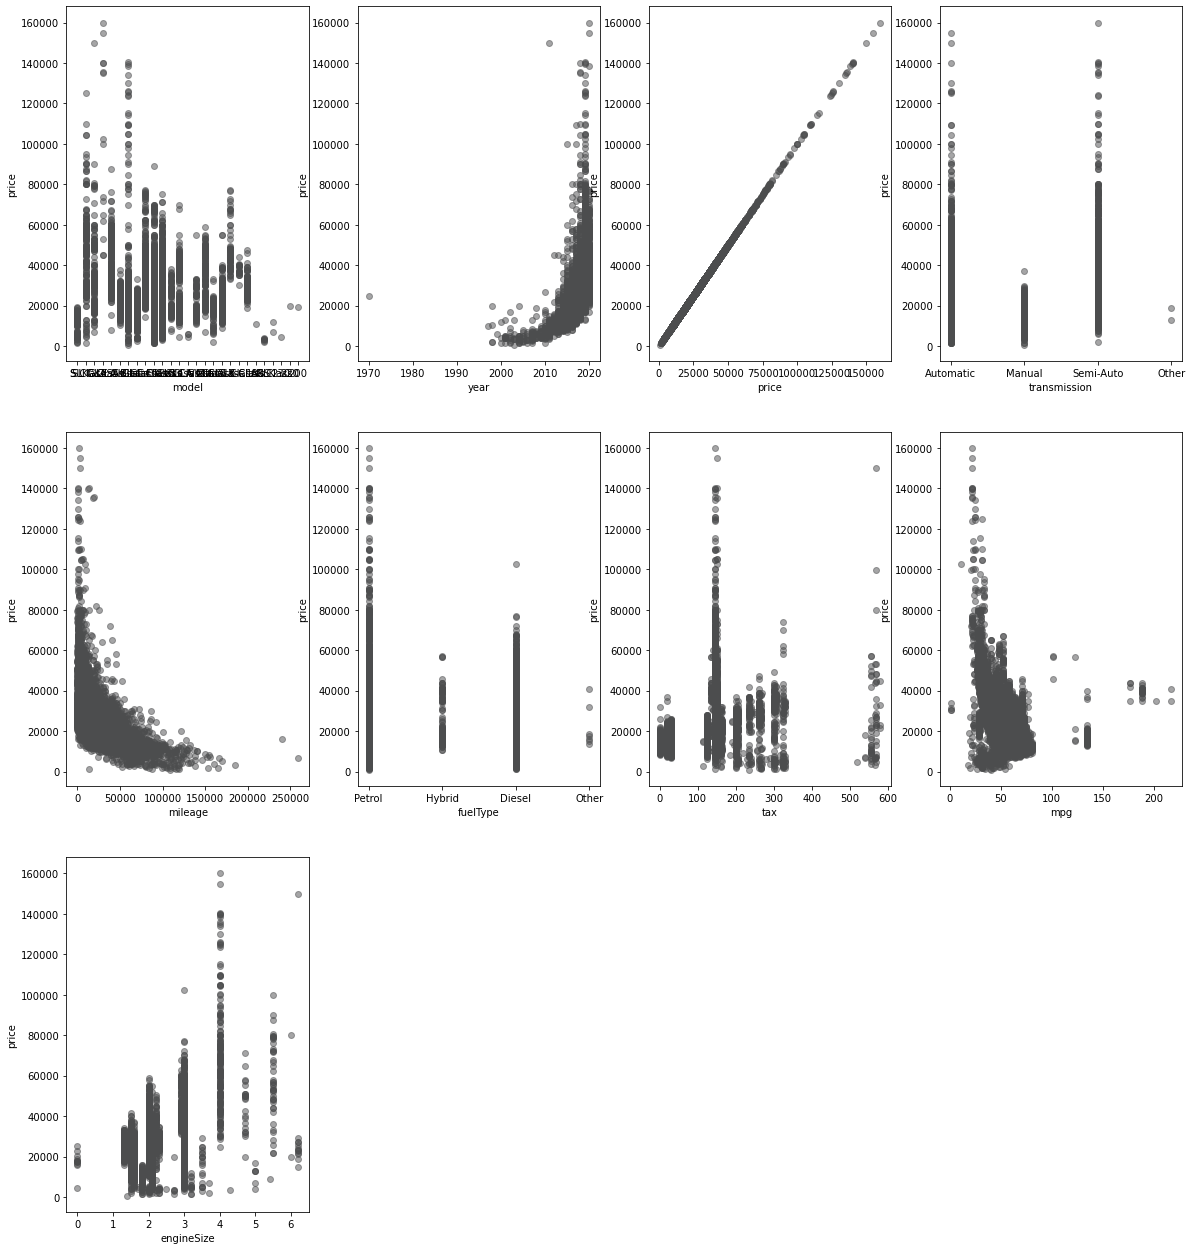

In [17]:
plt.figure(figsize=(20,30))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(auto_data[column], auto_data['price'], color='#4c4d4e', alpha = 0.5)
    plt.xlabel(column)
    plt.ylabel('price')

<AxesSubplot:>

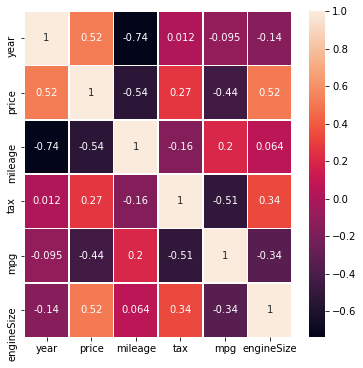

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(auto_data.corr(method='pearson'), annot = True, linewidths=0.7, ax=ax )

> Нет линейной зависимости.

In [19]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [20]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.313, -0.736,  0.231,  0.083,  0.055],
       [ 0.313, -0.64 ,  0.231,  0.162, -0.119],
       [-0.572,  0.662, -1.52 ,  0.592,  0.055],
       ...,
       [ 0.755, -0.508,  0.307,  0.083,  0.055],
       [ 0.755, -0.766,  0.231, -0.129, -1.334],
       [ 0.313,  0.052,  0.231,  0.797,  0.055]])

In [21]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 6875.358


In [22]:
print (f'Test std: {round(Y_test.std(),3)}')

Test std: 12330.882


Text(0, 0.5, 'Target')

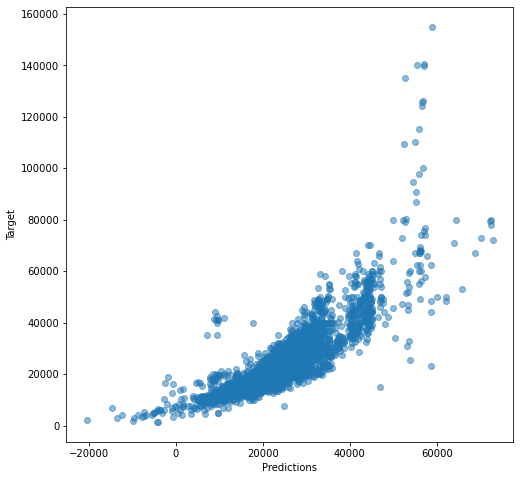

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [24]:
simple_LR.intercept_, simple_LR.coef_

(24630.70456277899,
 array([ 4517.241, -3073.426,  -699.847, -2344.369,  6247.961]))

In [25]:
pd.DataFrame(simple_LR.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
year,4517.241
mileage,-3073.426
tax,-699.847
mpg,-2344.369
engineSize,6247.961


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

### ► Lasso

In [27]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions_lassoCV = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_lassoCV, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')

pd.DataFrame(model.coef_, X_train.columns,  columns=['Coefficients'])

RMSE = 6875.502
Test std: 12330.882


,Coefficients
year,4517.200
mileage,-3072.260
tax,-697.335
mpg,-2342.788
engineSize,6246.533


### ► LassoCV

In [28]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')
pd.DataFrame(model.coef_,  X_train.columns, columns=['Coefficients'])

RMSE = 6878.056
Test std: 12330.882


,Coefficients
year,4510.076
mileage,-3060.012
tax,-661.262
mpg,-2319.884
engineSize,6225.147


### ► Ridge

In [29]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])

RMSE = 6875.463


,Coefficients
year,4516.616
mileage,-3073.438
tax,-699.387
mpg,-2344.229
engineSize,6247.074


### ► RidgeCV

In [30]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])

RMSE = 6876.413


,Coefficients
year,4511.002
mileage,-3073.539
tax,-695.250
mpg,-2342.965
engineSize,6239.101


> Регуляризатор **Ridge** чуть получше.

## Пробуем Dummies

In [226]:
auto_data = pd.read_csv("data/merc.csv")

#уберём слишком старые автомобили, они в геометрической прогрессии дешевле
auto_data['year'] = auto_data.year.clip(lower=auto_data.year.quantile(0.01))

#также обработаем самые новые и самые заезженные
#вот это прям очень сильно повлияло
auto_data['mileage'] = auto_data.price.clip(lower=auto_data.mileage.quantile(0.01),
                                          upper=auto_data.mileage.quantile(0.99))
                                                      
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('transmission', axis=1), 
                             pd.get_dummies(auto_data_dummy['transmission'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('fuelType', axis=1), 
                             pd.get_dummies(auto_data_dummy['fuelType'])], axis = 1)
auto_data_dummy

,year,price,mileage,tax,mpg,...,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2010,5200,5200.0,325,32.1,...,0,0,0,0,1
1,2017,34948,34948.0,20,61.4,...,0,0,1,0,0
2,2016,49948,49948.0,555,28.0,...,0,0,0,0,1
3,2016,61948,61948.0,325,30.4,...,0,0,0,0,1
4,2016,73948,73948.0,325,30.1,...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,35999.0,145,55.4,...,0,1,0,0,0
13115,2020,24699,24699.0,145,55.4,...,0,1,0,0,0
13116,2019,30999,30999.0,145,41.5,...,0,1,0,0,0
13117,2019,37990,37990.0,145,45.6,...,0,1,0,0,0


In [227]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, shuffle = False)
X_train

,year,mileage,tax,mpg,engineSize,...,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2010,5200.0,325,32.1,1.8,...,0,0,0,0,1
1,2017,34948.0,20,61.4,2.1,...,0,0,1,0,0
2,2016,49948.0,555,28.0,5.5,...,0,0,0,0,1
3,2016,61948.0,325,30.4,4.0,...,0,0,0,0,1
4,2016,73948.0,325,30.1,4.0,...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9178,2020,28429.0,145,56.5,2.0,...,1,1,0,0,0
9179,2019,35899.0,145,36.2,3.0,...,0,0,0,0,1
9180,2017,22799.0,145,58.9,2.1,...,1,1,0,0,0
9181,2017,17899.0,145,68.9,1.5,...,0,1,0,0,0


In [228]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-4.702, -1.893,  3.562, ..., -0.099,  0.   ,  1.487],
       [-0.474,  0.731, -2.122, ..., 10.108,  0.   , -0.673],
       [-1.078,  2.055,  7.848, ..., -0.099,  0.   ,  1.487],
       ...,
       [-0.474, -0.341,  0.208, ..., -0.099,  0.   , -0.673],
       [-0.474, -0.773,  0.208, ..., -0.099,  0.   , -0.673],
       [ 0.734,  0.886,  0.208, ..., -0.099,  0.   , -0.673]])

In [229]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 455711014246941.5


### ► LassoCV

In [230]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')
pd.DataFrame(model.coef_,  X_train.columns, columns=['Coefficients'])

RMSE = 941.7
Test std: 10003.004


,Coefficients
year,-390.460
mileage,12224.039
tax,-9.971
mpg,86.398
engineSize,-103.550
...,...
Semi-Auto,0.000
Diesel,4.213
Hybrid,-40.809
Other,0.000


Text(0, 0.5, 'Target')

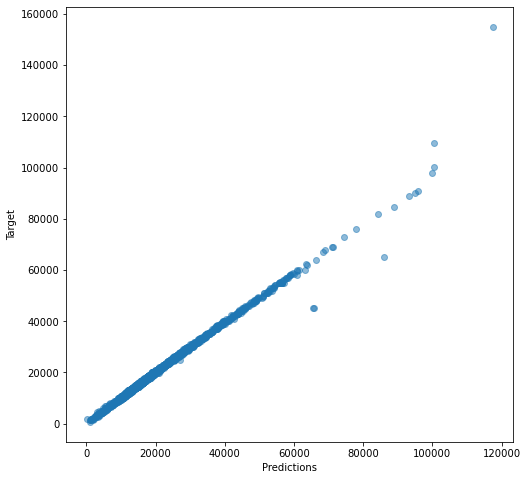

In [217]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Target')

### ► RidgeCV

In [233]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')
pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])

RMSE = 987.355
Test std: 10003.004


,Coefficients
year,-491.242
mileage,12397.757
tax,15.246
mpg,112.891
engineSize,-183.587
...,...
Semi-Auto,9.590
Diesel,28.429
Hybrid,-62.276
Other,0.000


Text(0, 0.5, 'Target')

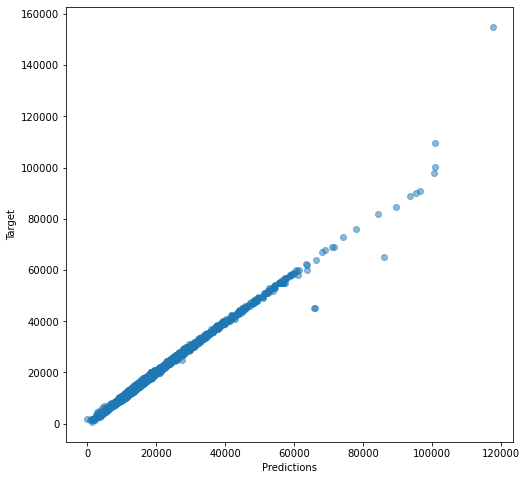

In [232]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Target')

> Not bad

## Попробуем RandomForest

In [236]:
from sklearn.ensemble import RandomForestRegressor

auto_data = pd.read_csv("data/merc.csv")
#уберём слишком старые автомобили, они в геометрической прогрессии дешевле
auto_data['year'] = auto_data.year.clip(lower=auto_data.year.quantile(0.01))

#также обработаем самые новые и самые заезженные
#вот это прям очень сильно повлияло
auto_data['mileage'] = auto_data.price.clip(lower=auto_data.mileage.quantile(0.01),
                                          upper=auto_data.mileage.quantile(0.99))
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('transmission', axis=1), 
                             pd.get_dummies(auto_data_dummy['transmission'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('fuelType', axis=1), 
                             pd.get_dummies(auto_data_dummy['fuelType'])], axis = 1)

X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')
pd.DataFrame(model.feature_importances_, X_train.columns, columns=['Importance']).sort_values('Importance')

RMSE = 771.948
Test std: 12330.882


,Importance
Other,0.000e+00
220,0.000e+00
180,0.000e+00
200,0.000e+00
Other,1.512e-14
...,...
A Class,2.159e-04
tax,3.686e-04
year,1.787e-03
mpg,2.430e-03


Text(0, 0.5, 'Target')

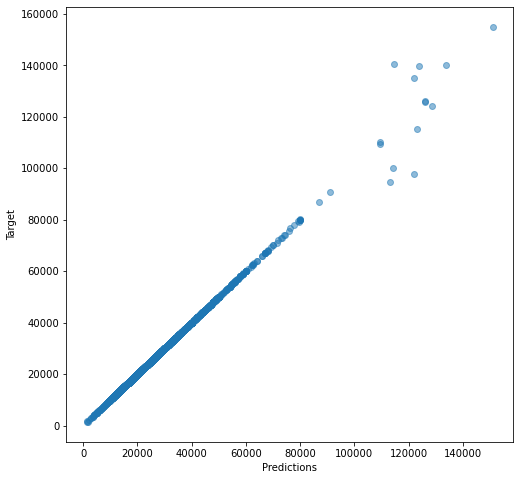

In [237]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Target')

> RandomForest неплохо сработал.

> Если не "резать" данные, то RandomForest даёт RMSE: 2500, что по сравнению с 6500 весьма неплохо. 